# Result comparaison for Superpixels Entropy

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import

import EntropyRateSuperpixel as ERS
import MyDataset as Data

from SSGA import SSGA

In [2]:
usedDataset = Data.IndianPines
#usedDataset = PaviaUniversity
#usedDataset = PaviaCenter

N,M,B = usedDataset["shape"]
N,M,B = usedDataset["data"].shape

### Finding $\lambda$ coefficient

See hyperspectral image of dimension $(N,M,B)$ has a 8-connected graph with nodes being all $N\times M$ spectral vectors.

Let $s$ be the similarity function, originally,
$$s(x,y) = d(x,y)\bigg|\frac{1}{B} \underset{b=1}{\overset{B}{\sum}} x_b - y_b\bigg|$$
with
$$d(x,y) = \begin{cases} 

Weight on edes (gain):
$$Gain(e) = ERG(e) + A.BG(N\times M,\; 1,\; 1)$$
with
$$ERG(e) = ERG(e.w,\; lw[e.u]\;, lw[e.v]\;)$$

$$ERG(w, a, b) = \frac{1}{log(2)}
\begin{cases}
(w+a)log(w+a) + (w+b)log(w+b) -alog(a) -blog(b) -2wlog(w) & \text{if well defined}\\
0 & \text{otherwise}
\end{cases}
$$
being the similarity weight part,
$$ BG(N, a, b) = \frac{1}{log(2)}\left(-(a+b).log(a+b) + a.log(a) + b.log(b)\right)  +1 $$
being the balancing part,
$$ A = \lambda \frac{\underset{e \in Edges}{max}\;ERG(e)}{|BG(N\times M,\; 1,\; 1)|}$$
being the balancing term

In [ ]:
def find_lambda_coeff(data, K, mini, maxi, similarity_function, Ps):
    def aux(i,j, SP):
        coeff = int((i+j)/2)
        print("finding lambda coeff:", coeff)
        if i>=j:
            return SP, coeff
        SP = ERS.find_superpixel(data, K, coeff, similarity_function)
        minSPsize = min([len(l) for l in SP])
        if minSPsize==Ps:
            return SP, coeff
        elif minSPsize<Ps:
            return aux(coeff+1, j, SP)
        else:
            return aux(i, coeff-1, SP)
        
    return aux(mini, maxi, None)


### Comparing function

Superpixel computation time + SSGA computation times
Average SSGA final fitness function score
OA of SP classifier models

### Comparing data change

In [ ]:
data1 = usedDataset["data"].copy()
data2 = Data.normalized_data(usedDataset["data"].copy())
data3 = Data.standardize_data( usedDataset["data"].copy() )
datas = [data1, data2, data3]

### Comparing similarity function

In [ ]:
K = 700
print(N,M, B)
print(N*M, K, N*M/K)

gamma = 0.15
Ps = N*M/K * 1/np.log(np.log(N*M/K)) * gamma
print(Ps)
Ps =  int(Ps)

145 145 200
21025 700 30.035714285714285
3.6794125840283103


In [ ]:
"""
SP, coeff = find_lambda_coeff(usedDataset["data"], K, 1, 1000, complete_basic_similarity, Ps)
print(coeff)
SP1_overlay = create_overlay_borders(usedDataset["data"][:,:,0], SP)
l = [len(l) for l in SP]
l.sort()
print(l)
"""

'\nSP, coeff = find_lambda_coeff(usedDataset["data"], K, 1, 1000, complete_basic_similarity, Ps)\nprint(coeff)\nSP1_overlay = create_overlay_borders(usedDataset["data"][:,:,0], SP)\nl = [len(l) for l in SP]\nl.sort()\nprint(l)\n'

In [ ]:
SP2, coeff2 = find_lambda_coeff(usedDataset["data"], K, 10, 500, ERS.complete_norm_similarity, Ps)
print(coeff2)
SP2_overlay = ERS.create_overlay_borders(usedDataset["data"][:,:,0], SP2)
l = [len(l) for l in SP2]
l.sort()
print(l)

finding lambda coeff: 255
finding lambda coeff: 378
finding lambda coeff: 439
finding lambda coeff: 408
finding lambda coeff: 393
finding lambda coeff: 400
finding lambda coeff: 404
finding lambda coeff: 406
finding lambda coeff: 407
407
[2, 4, 6, 7, 8, 8, 10, 11, 12, 12, 13, 13, 13, 13, 14, 14, 14, 14, 15, 15, 15, 15, 16, 16, 16, 16, 16, 16, 16, 16, 16, 17, 17, 17, 17, 17, 17, 17, 17, 17, 17, 17, 18, 18, 18, 18, 18, 18, 18, 18, 18, 18, 19, 19, 19, 19, 19, 19, 19, 19, 19, 19, 19, 19, 19, 20, 20, 20, 20, 20, 20, 20, 20, 20, 20, 20, 20, 21, 21, 21, 21, 21, 21, 21, 21, 21, 21, 21, 21, 21, 21, 21, 21, 21, 21, 21, 21, 21, 21, 21, 21, 22, 22, 22, 22, 22, 22, 22, 22, 22, 22, 22, 22, 22, 22, 22, 22, 22, 22, 22, 22, 22, 22, 22, 23, 23, 23, 23, 23, 23, 23, 23, 23, 23, 23, 23, 23, 23, 23, 23, 23, 23, 23, 23, 23, 23, 23, 23, 23, 23, 23, 23, 23, 23, 23, 23, 23, 23, 23, 24, 24, 24, 24, 24, 24, 24, 24, 24, 24, 24, 24, 24, 24, 24, 24, 24, 24, 24, 24, 24, 24, 24, 24, 24, 24, 24, 25, 25, 25, 25, 25, 25,

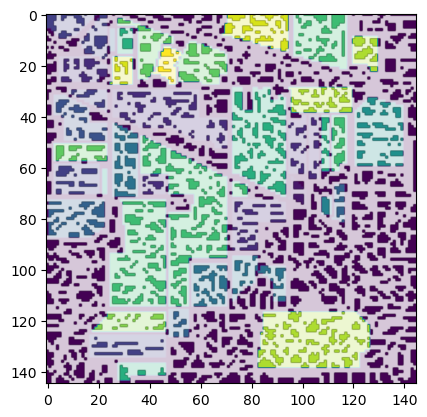

In [ ]:
b = np.random.randint(0, B-1)

overlays = [SP2_overlay]
color = [255,255,255,200]
for k in range(len(overlays)):
    for i in range(N):
        for j in range(M):
            if overlays[k][i,j][3] != 0:
                overlays[k][i,j] = color
    
    plt.imshow(usedDataset["gt"])
    plt.imshow(overlays[k])

plt.show()